# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
#installled selenium because I was having trouble accessing the chrome driver
!pip install selenium

In [30]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [31]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [32]:
# Create a Beautiful Soup Object
from bs4 import BeautifulSoup
import requests

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# send a GET request to the URL
response = requests.get(url)

# analyze the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

print(table)


<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.

In [7]:
# Extract all rows of data

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

rows = table.find_all('tr')

for row in rows:
    print(row)


<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [33]:
# create an empty list

# looped through the scraped data to create a list of rows
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

# grab table headers
headers = [header.text.strip() for header in table.find_all('th')]

# create an empty list to store the table data
rows_data = []

rows = table.find_all('tr')[1:] 
# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    
    rows_data.append(row_data)


for row in rows_data:
    print(row)


['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [34]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

# grab table headers
headers = [header.text.strip() for header in table.find_all('th')]

# create an empty list to store the data
rows_data = []

rows = table.find_all('tr')[1:]  

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    
    rows_data.append(row_data)

# created a Pandas DataFrame using the list of rows and column names
df = pd.DataFrame(rows_data, columns=headers)

print(df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [10]:
# Confirm DataFrame was created successfully

import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage containing the table
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table element
table = soup.find('table')

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Initialize an empty list to store the table data
rows_data = []

# Extract table rows
rows = table.find_all('tr')[1:]  # Exclude the header row

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract data from each cell in the row
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    
    # Append the row data to the list of rows
    rows_data.append(row_data)

# Create a Pandas DataFrame using the list of rows and column names
df = pd.DataFrame(rows_data, columns=headers)

# Print the DataFrame to confirm it was created successfully
print(df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column

print(df.info())

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

df['sol'] = df['sol'].astype(int)

df['ls'] = df['ls'].astype(float)

df['month'] = df['month'].astype(int)

df['min_temp'] = df['min_temp'].astype(float)

df['pressure'] = df['pressure'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB
None


In [12]:
# change data types for data analysis
import pandas as pd

# converted 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# converted 'sol' column to integer
df['sol'] = df['sol'].astype(int)

# converted 'ls' column to float
df['ls'] = df['ls'].astype(float)

# converted 'month' column to integer
df['month'] = df['month'].astype(int)

# converted 'min_temp' column to float
df['min_temp'] = df['min_temp'].astype(float)

# converted 'pressure' column to float
df['pressure'] = df['pressure'].astype(float)


In [13]:
# confirm type changes were successful by examining data types again

print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?

num_months = df['month'].nunique()

print("Number of months on Mars:", num_months)


Number of months on Mars: 12


In [17]:
# 2. How many Martian days' worth of data are there?

num_sols = df['sol'].nunique()

print("Number of Martian days' worth of data:", num_sols)

Number of Martian days' worth of data: 1867


In [18]:
# 3. What is the average low temperature by month?

average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(average_low_temp_by_month)


Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


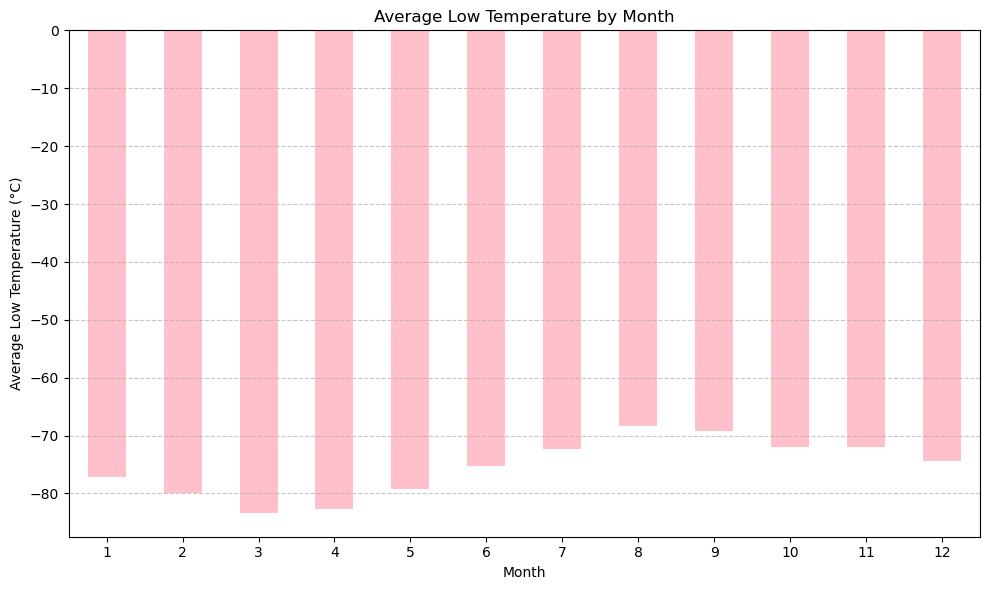

In [19]:
# Plot the average temperature by month

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='pink')  
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


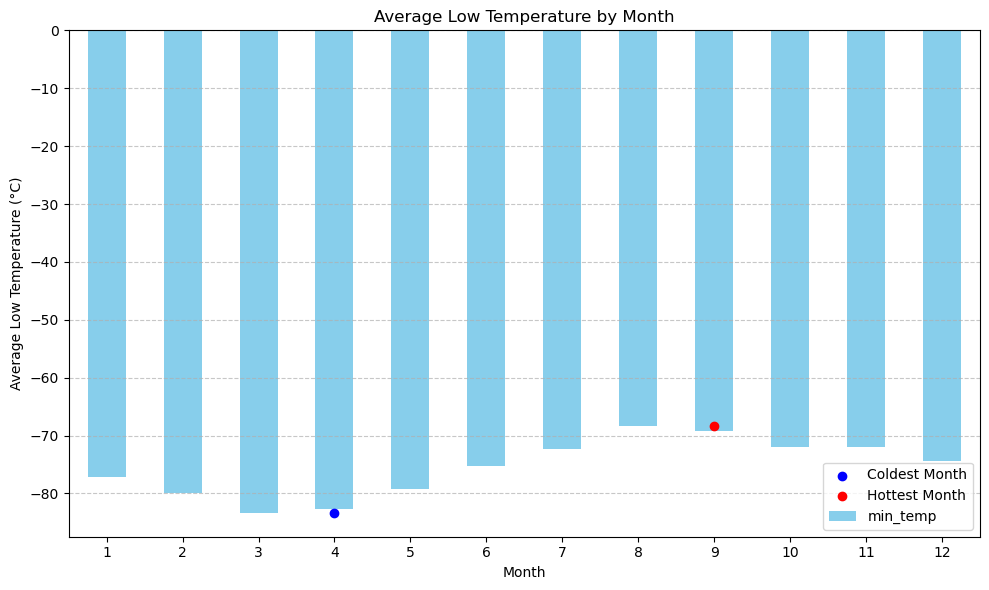

In [22]:
# Identify the coldest and hottest months in Curiosity's location


coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='skyblue')  
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# added markers for the coldest and hottest months
plt.scatter([coldest_month], [average_low_temp_by_month[coldest_month]], color='blue', label='Coldest Month')
plt.scatter([hottest_month], [average_low_temp_by_month[hottest_month]], color='red', label='Hottest Month')

plt.legend()  
plt.tight_layout()
plt.show()


In [17]:
# 4. Average pressure by Martian month

average_pressure_by_month = df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


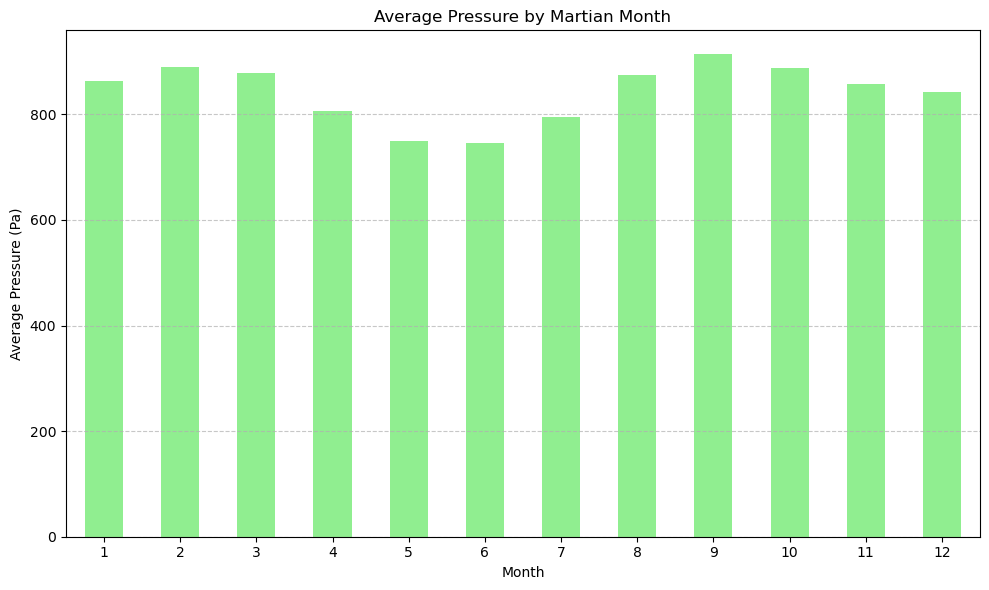

In [24]:
# Plot the average pressure by month

# re-defined average_pressure_by_month, kept getting 'not defined' error
average_pressure_by_month = df.groupby('month')['pressure'].mean()

plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='lightgreen')  
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


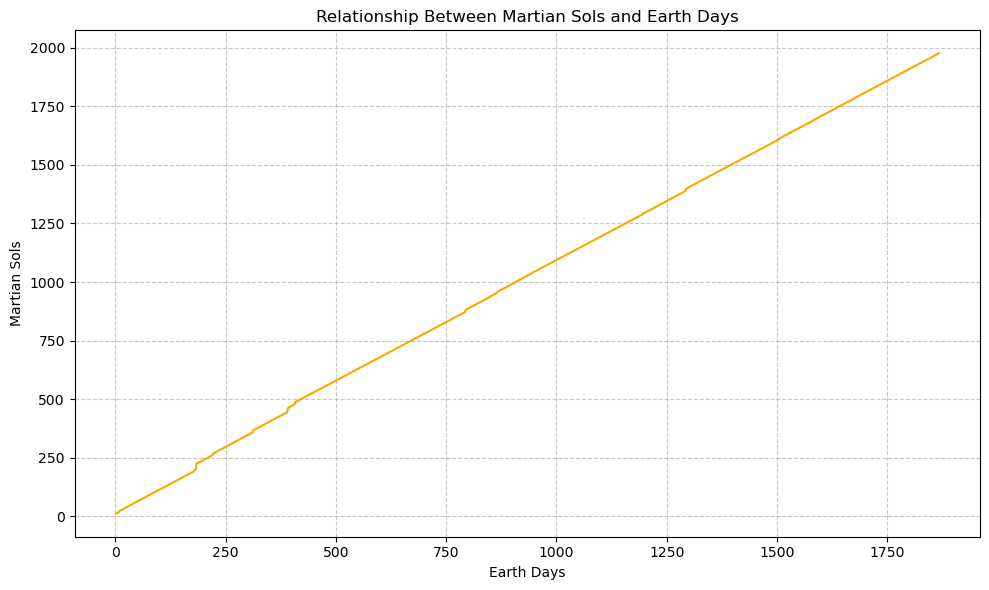

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?

import matplotlib.pyplot as plt

# defined the number of Martian sols and corresponding Earth days
martian_sols = df['sol']
earth_days = range(1, len(martian_sols) + 1)

plt.figure(figsize=(10, 6))
plt.plot(earth_days, martian_sols, color='orange')
plt.title('Relationship Between Martian Sols and Earth Days')
plt.xlabel('Earth Days')
plt.ylabel('Martian Sols')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV

filename = 'mars_data.csv'

df.to_csv(filename, index=False)

print("Data has been successfully written to", filename)


Data has been successfully written to mars_data.csv


In [27]:
browser.quit()